In [291]:
import pandas as pd

md = pd.read_csv('updated_md.csv')

## Metadata tasks
- Create age column using birthdate data to find average age. Receive age based on createDate. 
- Most common day to create Tinder? 
- Average age filter for M/F, F/M, F/F, M/M
- Number of how many M/F, M/M, F/M, F/F
- Number of countries represented 
    - States are in ['country'] column. Strange.
- Most popular city/region in U.S.? 
- Jobs? Does not display company. Show common jobs or most interesting ones? 
    - [{'companyDisplayed': False, 'titleDisplayed': True, 'title': 'Servicedesk'}]
- Schools? Do something similar as with jobs. 
    - [{'displayed': True, 'metadata_id': 'ope_340100', 'name': 'Brown University'}]

In [421]:
md.head()

,gender,age,birthDate,createDate,jobs,schools,cityName,country,interestedIn,genderFilter,ageFilterMin,ageFilterMax,instagram,spotify
0,M,21,1999-02-06,2020-06-19,NaN,NaN,Seattle,WA,F,F,18,22,True,True
2,M,23,1997-08-14,2021-03-20,Servicedesk,NaN,Stockholm,Sweden,F,F,20,27,False,True
4,M,21,1998-09-29,2019-11-21,Pfizer Vaccine Distributor,Brown University,Berkeley,CA,F,F,18,28,False,False
6,M,24,1994-07-26,2018-12-06,Software developer,The Ohio State University,Columbus,OH,F,F,21,30,False,True
8,M,29,1991-07-17,2020-09-12,NaN,NaN,NaN,NaN,M,M,23,36,False,False


In [292]:
# CSV of updated_md has duplicates
md = md.drop_duplicates(keep=False)

from datetime import datetime, date

md['birthDate'] = pd.to_datetime(md.birthDate, format='%Y.%m.%d').dt.date
md['createDate'] = pd.to_datetime(md.createDate, format='%Y.%m.%d').dt.date

md['Age'] = (md['createDate'] - md['birthDate'])/365
md['age'] = md['Age'].astype(str)
md['age'] = md['age'].str[:3]
md['age'] = md['age'].astype(int)

# Dropping unnecessary columns
md = md.drop(columns = 'Age')
md = md.drop(columns= 'education')
md = md.drop(columns= 'educationLevel')

# Rearranging columns
md = md[['gender', 'age', 'birthDate','createDate', 'jobs', 'schools', 'cityName', 'country',
        'interestedIn', 'genderFilter', 'ageFilterMin', 'ageFilterMax','instagram',
       'spotify']]
# Replaces empty list with NaN
md = md.mask(md.applymap(str).eq('[]'))

# Converting age filter to integer
md['ageFilterMax'] = md['ageFilterMax'].astype(int)
md['ageFilterMin'] = md['ageFilterMin'].astype(int)

# Visualizing age data

In [321]:
import numpy as np
%matplotlib inline

In [363]:
# ALL AGEMAX CLEANING
# Had 17 people who put 10000 as their age max and 
# one person who put 95. Those are removed and assumed
# to be trolls. 
all_age = all_age.drop(index=all_age[all_age["ageFilterMax"]==1000].index)
all_age = all_age.drop(index=all_age[all_age["ageFilterMax"]==95].index)

# ALL AGE CLEANING
# Had 1 person put 106 as age. 
# Another with 137
# Two people with 16 removed
all_age = all_age.drop(index=all_age[all_age["age"]==106].index)
all_age = all_age.drop(index=all_age[all_age["age"]==137].index)
all_age = all_age.drop(index=all_age[all_age["age"]==16].index)
all_age = all_age.drop(index=all_age[all_age["age"]==15].index)

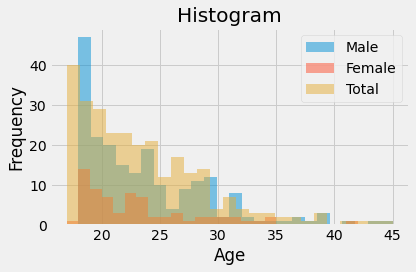

In [367]:
# Age as histogram

import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline
plt.style.use('fivethirtyeight')

x1 = all_age.age[all_age.gender.str.contains("M")]
x2 = all_age.age[all_age.gender.str.contains("F")]
x3 = all_age.age

fig, ax = plt.subplots()

ax.hist(x1, 25, alpha=0.5, label='Male')
ax.hist(x2, 25, alpha=0.5, label='Female')
ax.hist(x3, 25, alpha=0.5, label='Total')
ax.set_title('Histogram')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

plt.legend()
fig.tight_layout()
plt.show()

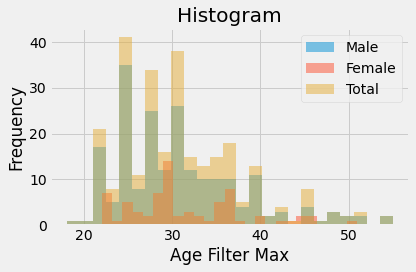

In [368]:
# ageFilterMax as histogram

import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline
plt.style.use('fivethirtyeight')

x1 = all_age.ageFilterMax[all_age.gender.str.contains("M")]
x2 = all_age.ageFilterMax[all_age.gender.str.contains("F")]
x3 = all_age.ageFilterMax

fig, ax = plt.subplots()

ax.hist(x1, 25, alpha=0.5, label='Male')
ax.hist(x2, 25, alpha=0.5, label='Female')
ax.hist(x3, 25, alpha=0.5, label='Total')
ax.set_title('Histogram')
ax.set_xlabel('Age Filter Max')
ax.set_ylabel('Frequency')

plt.legend()
fig.tight_layout()
plt.show()

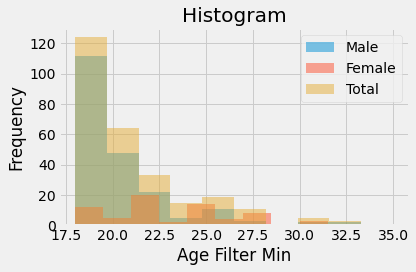

In [371]:
# ageFilterMin as histogram

import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline
plt.style.use('fivethirtyeight')

x1 = all_age.ageFilterMin[all_age.gender.str.contains("M")]
x2 = all_age.ageFilterMin[all_age.gender.str.contains("F")]
x3 = all_age.ageFilterMin

fig, ax = plt.subplots()

ax.hist(x1, 10, alpha=0.5, label='Male')
ax.hist(x2, 10, alpha=0.5, label='Female')
ax.hist(x3, 10, alpha=0.5, label='Total')
ax.set_title('Histogram')
ax.set_xlabel('Age Filter Min')
ax.set_ylabel('Frequency')

plt.legend()
fig.tight_layout()
plt.show()

In [385]:
# Combined age data
print("The average user age for both genders is", all_age.age.mean().round())
print("The average user age filter maximum for both genders is", all_age.ageFilterMin.mean().round())
print("The average user age filter minimum for both genders is", all_age.ageFilterMax.mean().round())

print("--------------------")

# By gender
print("The average male user age is", all_age.age[all_age.gender.str.contains("M")].mean().round())
print("The average female user age", all_age.age[all_age.gender.str.contains("F")].mean().round())

print("--------------------")

print("The average male user age filter maximum is", all_age.ageFilterMax[all_age.gender.str.contains("M")].mean().round())
print("The average female user age filter maximum is", all_age.ageFilterMax[all_age.gender.str.contains("F")].mean().round())

print("--------------------")

print("The average male user age filter minumum is", all_age.ageFilterMin[all_age.gender.str.contains("M")].mean().round())
print("The average female user age filter minumum is", all_age.ageFilterMin[all_age.gender.str.contains("F")].mean().round())

The average user age for both genders is 24.0
The average user age filter maximum for both genders is 21.0
The average user age filter minimum for both genders is 31.0
--------------------
The average male user age is 24.0
The average female user age 23.0
--------------------
The average male user age filter maximum is 31.0
The average female user age filter maximum is 32.0
--------------------
The average male user age filter minumum is 20.0
The average female user age filter minumum is 23.0


# Charts

In [418]:
# Creating df of jobs listed
jobs_df = pd.DataFrame(md['jobs'].value_counts(dropna=True))
jobs_df.reset_index(level=0, inplace=True)
jobs_df = jobs_df.rename(columns={"index": "Jobs", "jobs": "Count"})

# Dropped index that said False
jobs_df = jobs_df.drop(0)

# To show whole df
pd.set_option('display.max_rows', 116)

jobs_df.head()

,Jobs,Count
1,Software Engineer,6
2,Engineer,5
3,Consultant,2
4,Grad Student,2
5,PhD Student,2


In [420]:
fav_jobs = jobs_df.loc[[9, 24, 26, 31, 36, 40, 39, 77, 80]]

fav_jobs

,Jobs,Count
9,World Class Nap Taker,1
24,Brow Waxing Expert,1
26,Macgyver,1
31,Mycologist,1
36,Prediction Market Trader,1
40,Village Idiot,1
39,concept artist,1
77,Robot,1
80,"Engineer, Axe throwing instructor",1


In [140]:
# Creating df of schools listed
school_df = pd.DataFrame(md['schools'].value_counts(dropna=True))
school_df.reset_index(level=0, inplace=True)
school_df = school_df.rename(columns={"index": "Schools", "schools": "Count"})

# To show whole df
#pd.set_option('display.max_rows', 116)

school_df

,Schools,Count
0,University of Illinois at Urbana-Champaign,4
1,New York University,3
2,York University,3
3,University of Washington,2
4,"California State University, Fullerton",2
5,University of Wisconsin-Madison,2
6,UCLA,2
7,"University of California, Riverside",2
8,Rensselaer Polytechnic Institute,2
9,Oregon State University,2


In [145]:
# Creating df of cities listed
city_df = pd.DataFrame(md['cityName'].value_counts(dropna=True))
city_df.reset_index(level=0, inplace=True)
city_df = city_df.rename(columns={"index": "City", "cityName": "Count"})

# To show whole df
#pd.set_option('display.max_rows', 119)

city_df

,City,Count
0,Toronto,6
1,New York,6
2,London,5
3,Seattle,4
4,San Francisco,4
5,Los Angeles,4
6,Portland,3
7,Richmond,3
8,Madison,3
9,Vancouver,3


In [146]:
# Creating df of countries/states listed
country_df = pd.DataFrame(md['country'].value_counts(dropna=True))
country_df.reset_index(level=0, inplace=True)
country_df = country_df.rename(columns={"index": "Country/State", "country": "Count"})

# To show whole df
pd.set_option('display.max_rows', 75)

country_df

,Country/State,Count
0,CA,16
1,California,9
2,England,9
3,ON,8
4,Germany,5
5,BC,4
6,NY,4
7,United Kingdom,4
8,Wisconsin,4
9,New York,4
